<a href="https://colab.research.google.com/github/M-S-10/learn/blob/main/Normal_%26_Albedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

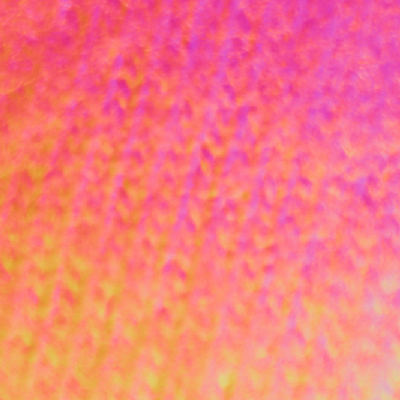

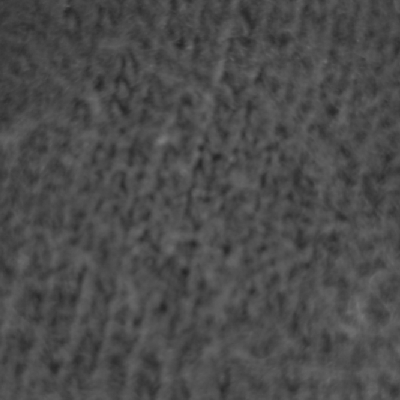

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the images captured under different lighting conditions
images = [
    cv2.imread('im_1.png', cv2.IMREAD_GRAYSCALE),  # Right LED
    cv2.imread('im_2.png', cv2.IMREAD_GRAYSCALE),  # Top LED
    cv2.imread('im_3.png', cv2.IMREAD_GRAYSCALE),  # Left LED
    cv2.imread('im_4.png', cv2.IMREAD_GRAYSCALE)   # Bottom LED
]
images = np.stack(images, axis=-1)

# Define light directions (assuming unit vectors pointing from LEDs towards the fabric)
light_directions = np.array([
    [1, 0, 1],   # Right LED
    [0, -1, 1],  # Top LED
    [-1, 0, 1],  # Left LED
    [0, 1, 1]    # Bottom LED
])
light_directions = light_directions / np.linalg.norm(light_directions, axis=1)[:, np.newaxis]  # Normalize

# Initialize normal map and albedo
height, width = images.shape[:2]
normals = np.zeros((height, width, 3))
albedo = np.zeros((height, width))

# Solve for normals and albedo
for i in range(height):
    for j in range(width):
        I = images[i, j, :]  # Intensities of the pixel under different lights
        G = np.linalg.lstsq(light_directions, I, rcond=None)[0]
        normal = G / np.linalg.norm(G)
        normals[i, j, :] = normal
        albedo[i, j] = np.linalg.norm(G)

# Normalize normal map for visualization
normals_vis = (normals + 1) / 2 * 255
normals_vis = normals_vis.astype(np.uint8)

# Save the results
cv2.imwrite('normals.png', normals_vis)
cv2.imwrite('albedo.png', albedo)

# Show the results
cv2_imshow(normals_vis)
cv2_imshow(albedo)
